In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine single dataFrame
mouse_study = study_results.merge(mouse_metadata, on="Mouse ID")

# Display the dataframe
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Check number of mice
mouse_study["Mouse ID"].nunique()

249

In [7]:
# Find duplicate mouse
duplicates = mouse_study[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')]
duplicate_mouse_ids = list(duplicates['Mouse ID'].unique())
# Print the duplicate
duplicate_mouse_ids

['g989']

In [8]:
# Dropping the duplicate mouse by its ID
mouse_study = mouse_study[~(mouse_study['Mouse ID'].isin(duplicate_mouse_ids) & mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']))]
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [9]:
# Checking number of mice in cleaned dataframe
mouse_study["Mouse ID"].nunique()

249

In [10]:
# Make a summary table of the tumor volume for each drug

grouped_data = mouse_study.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', lambda x: x.sem(ddof=0)]
}).reset_index()

# Rename the columns for clarity
grouped_data.columns = ['Drug Regimen', 'Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

summary_table = grouped_data.set_index('Drug Regimen')
# Display the summary DataFrame
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
Propriva,52.393463,50.909965,43.138803,6.568014,0.524174
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526


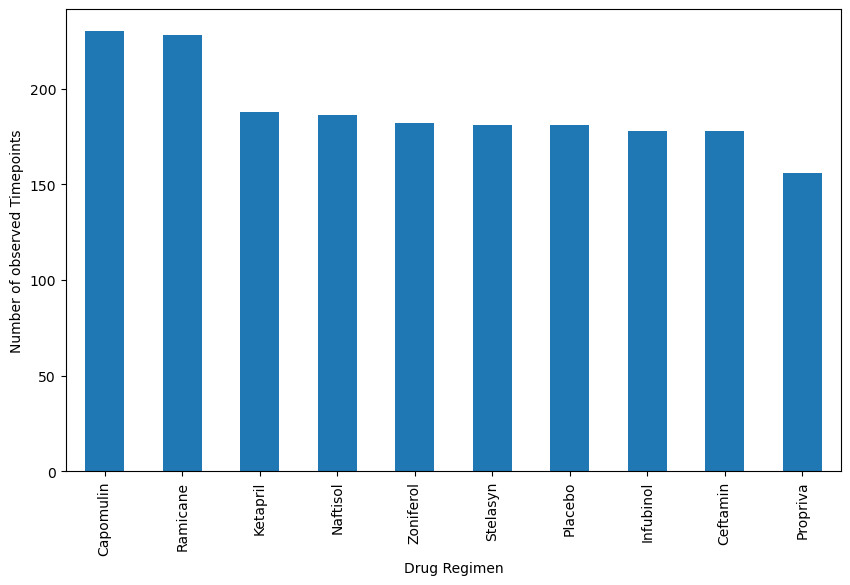

In [11]:
# Generate a bar plot showing (Mouse ID/Timepoints) for each drug regimen using Pandas
drug_regimen_counts = mouse_study['Drug Regimen'].value_counts()

# Create a bar plot
drug_regimen_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Drug Regimen')
plt.ylabel('Number of observed Timepoints')
plt.show()

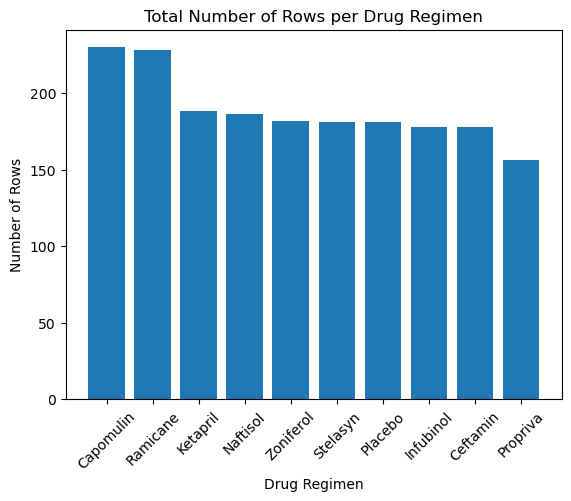

In [12]:
# Generate a bar plot showing (Mouse ID/Timepoints) for each drug regimen using pyplot
plt.bar(drug_regimen_counts.index, drug_regimen_counts)
plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

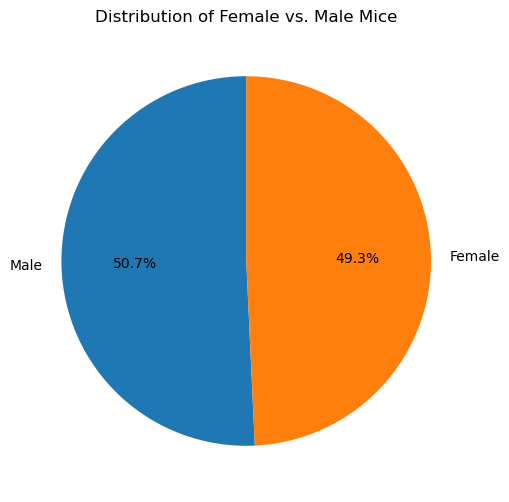

In [13]:
# Generate a pie plot of female versus male mice using Pandas
gender_counts = mouse_study['Sex'].value_counts()

# Create a pie plot using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('')  # Remove the 'Sex' label
plt.show()

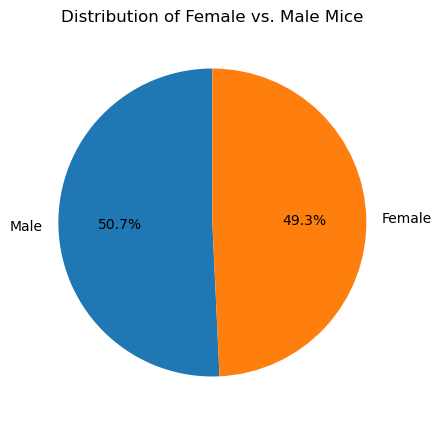

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs. Male Mice')
plt.show()

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = mouse_study.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = last_timepoints.merge(mouse_study, on=['Mouse ID', 'Timepoint'], how='inner')

# Filter the DataFrame to include only the specified treatment regimens
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(treatment_regimens)]
final_tumor_df

,Mouse ID,Drug Regimen,Final Tumor Volume (mm3)
Mouse ID,,,
a203,a203,Infubinol,67.973419
a251,a251,Infubinol,65.525743
a275,a275,Ceftamin,62.999356
a411,a411,Ramicane,38.407618
a444,a444,Ramicane,43.047543
...,...,...,...
y769,y769,Ceftamin,68.594745
y793,y793,Capomulin,31.896238
y865,y865,Ceftamin,64.729837


In [27]:
# Create empty list to fill with tumor vol data
tumor_volume_data = []

# Determine if there are any potential outliers. 
for treatment in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to tumor_volume_data
    tumor_volume_data.append(tumor_volume)
    
    # Calculate the quartiles
    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    
    # Calculate the IQR 
    iqr = upper_q - lower_q
    
    # Determine the lower and upper bounds 
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Determine potential outliers
    potential_outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    # Print the results for each treatment regimen
    print(f"{treatment}'s Potential Outliers:")
    if len(potential_outliers) == 0:
        print("No potential outliers found.")
    else:
        print(potential_outliers)

Capomulin's Potential Outliers:
No potential outliers found.
Ramicane's Potential Outliers:
No potential outliers found.
Infubinol's Potential Outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Potential Outliers:
No potential outliers found.


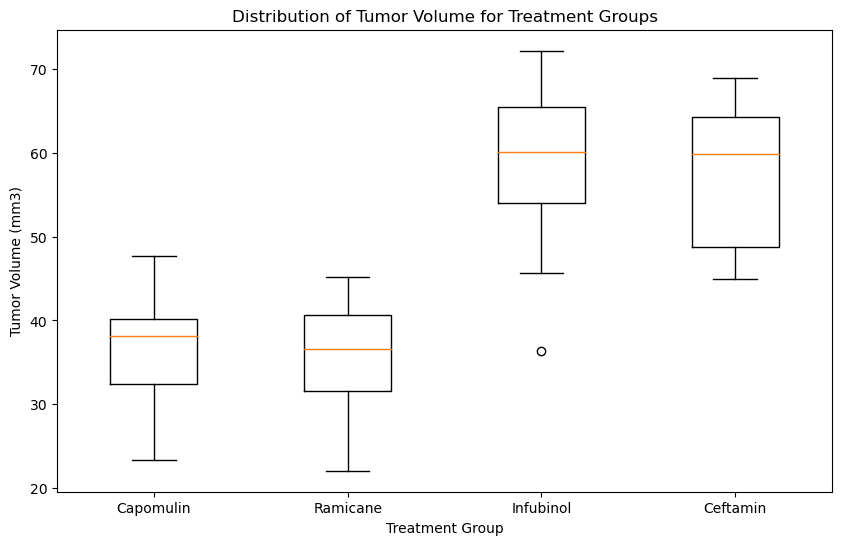

In [29]:
# Generate a box plot for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatment_regimens)
plt.title('Distribution of Tumor Volume for Treatment Groups')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

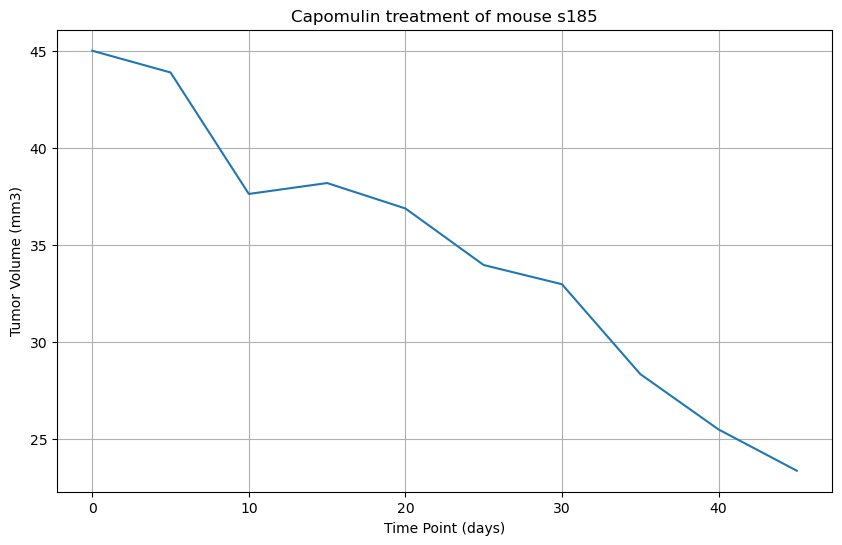

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a specific mouse treated with Capomulin
selected_mouse_id = 's185' 

# Filter the DataFrame to include data for the selected mouse and Capomulin treatment
selected_mouse_data = mouse_study[(mouse_study['Mouse ID'] == selected_mouse_id) & (mouse_study['Drug Regimen'] == 'Capomulin')]

# Create a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'])
plt.title(f'Capomulin treatment of mouse {selected_mouse_id}')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

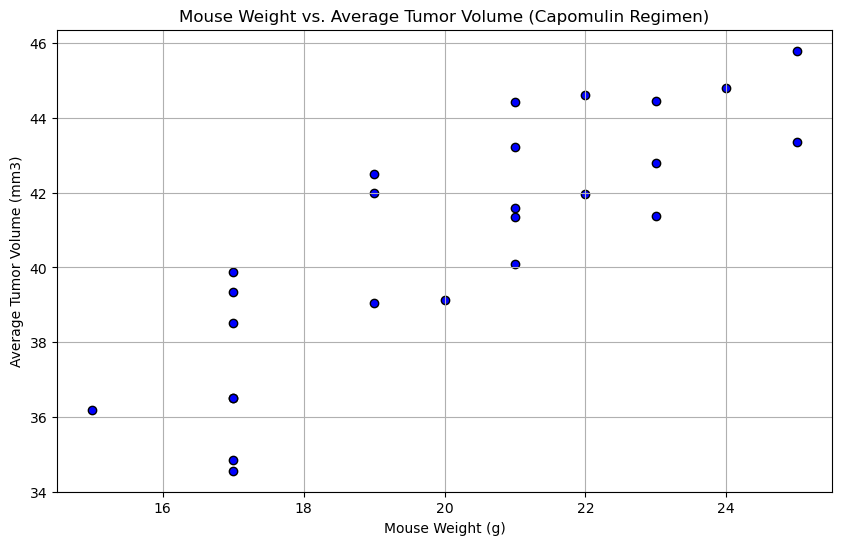

In [31]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame to include data for the Capomulin regimen
capomulin_data = mouse_study[mouse_study['Drug Regimen'] == 'Capomulin']

# Group the data by mouse and calculate the average tumor volume and mouse weight
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

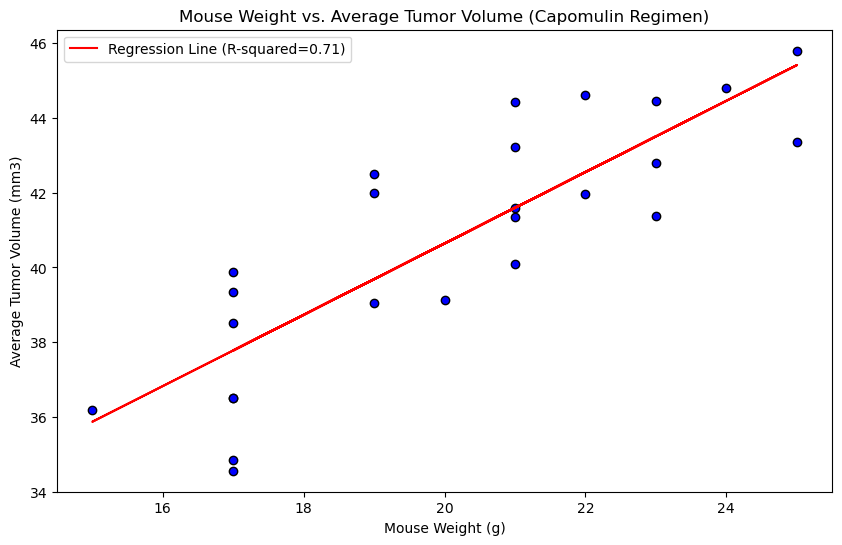

Correlation Coefficient: 0.84


In [39]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume in the Capomulin regimen
from scipy.stats import linregress  
correlation = mouse_weight.corr(average_tumor_volume)
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

# Calculate the regression line
regress_line = slope * mouse_weight + intercept

# Add the regression line to the plot
plt.plot(mouse_weight, regress_line, 'r', label=f'Regression Line (R-squared={r_value**2:.2f})')
plt.legend()

plt.grid(False)
plt.show()

# Display the correlation coefficient
print(f'Correlation Coefficient: {correlation:.2f}')